In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('myproj').getOrCreate()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib.pyplot import figure

In [0]:
pip install missingno

Python interpreter will be restarted.
Requirement already satisfied: missingno in /local_disk0/.ephemeral_nfs/envs/pythonEnv-3cf70be5-61ac-457b-86d4-f287dfcea15e/lib/python3.7/site-packages (0.4.2)
Requirement already satisfied: seaborn in /databricks/python3/lib/python3.7/site-packages (from missingno) (0.10.0)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.7/site-packages (from missingno) (3.1.3)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.7/site-packages (from missingno) (1.18.1)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.7/site-packages (from missingno) (1.4.1)
Requirement already satisfied: pandas>=0.22.0 in /databricks/python3/lib/python3.7/site-packages (from seaborn->missingno) (1.0.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.7/site-packages (from matplotlib->missingno) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib->missingno) (2.4.6)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib->missingno) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib->missingno) (1.1.0)
Requirement already satisfied: pytz>=2017.2 in /databricks/python3/lib/python3.7/site-packages (from pandas>=0.22.0->seaborn->missingno) (2019.3)
Requirement already satisfied: six in /databricks/python3/lib/python3.7/site-packages (from cycler>=0.10->matplotlib->missingno) (1.14.0)
Requirement already satisfied: setuptools in /usr/local/lib/python3.7/dist-packages (from kiwisolver>=1.0.1->matplotlib->missingno) (45.2.0)
Python interpreter will be restarted.

# 1. Data Preparation

In [0]:
sp_play = spark.read.csv('/FileStore/tables/plays.csv',inferSchema=True,header=True)
sp_week1 = spark.read.csv('/FileStore/tables/week1.csv',inferSchema=True,header=True)

In [0]:
sp_week1.show()

+--------------------+-----+-----+----+----+----+------+------+-----+-------+---------------+------------+--------+-------+--------+----------+------+-------------+-----+
 time| x| y| s| a| dis| o| dir|event| nflId| displayName|jerseyNumber|position|frameId| team| gameId|playId|playDirection|route|
+--------------------+-----+-----+----+----+----+------+------+-----+-------+---------------+------------+--------+-------+--------+----------+------+-------------+-----+
2018-09-07 01:07:...|91.73|26.67| 0.0|0.01|0.02|289.57|240.93| None| 310| Matt Ryan| 2| QB| 1| away|2018090600| 75| left| null|
2018-09-07 01:07:...|88.89|36.47|0.01|0.01|0.01|105.63| 66.66| None| 79848|Malcolm Jenkins| 27| SS| 1| home|2018090600| 75| left| null|
2018-09-07 01:07:...|91.35|44.16|0.02|0.03|0.01|290.45| 16.86| None|2495454| Julio Jones| 11| WR| 1| away|2018090600| 75| left|HITCH|
2018-09-07 01:07:...|86.31|22.01|0.09|0.42|0.01| 70.12|168.91| None|2495613| Corey Graham| 24| FS| 1| home|2018090600| 75| left| null|
2018-09-07 01:07:...|90.78|36.15| 0.0| 0.0| 0.0|257.61|193.97| None|2533040| Mohamed Sanu| 12| WR| 1| away|2018090600| 75| left|HITCH|
2018-09-07 01:07:...|73.64| 28.7|0.03|0.02|0.01|103.05|219.41| None|2534832| Rodney McLeod| 23| FS| 1| home|2018090600| 75| left| null|
2018-09-07 01:07:...|98.25|26.63|0.01|0.01| 0.0|265.88|194.51| None|2543583|Devonta Freeman| 24| RB| 1| away|2018090600| 75| left| null|
2018-09-07 01:07:...|86.48|31.12|0.09|0.03|0.04| 95.9| 33.36| None|2552315| Jordan Hicks| 58| MLB| 1| home|2018090600| 75| left| null|
2018-09-07 01:07:...|82.67|20.53|0.03|0.07|0.01| 81.14|174.57| None|2552689| Ronald Darby| 21| CB| 1| home|2018090600| 75| left| null|
2018-09-07 01:07:...| 84.0|43.49|0.14|0.05|0.01|108.23|110.32| None|2555383| Jalen Mills| 31| CB| 1| home|2018090600| 75| left| null|
2018-09-07 01:07:...|91.29|21.83|0.01|0.02|0.01|250.34|151.83| None|2555415| Austin Hooper| 81| TE| 1| away|2018090600| 75| left| OUT|
2018-09-07 01:07:...|85.63|26.59|0.03|0.04|0.02| 87.69| 38.8| None|2558175| Nate Gerry| 47| LB| 1| home|2018090600| 75| left| null|
2018-09-07 01:07:...|95.13|26.71|0.01|0.01|0.01| 250.1|237.27| None|2559033| Ricky Ortiz| 30| FB| 1| away|2018090600| 75| left| FLAT|
2018-09-07 01:07:...|90.11|26.85| 0.0| 0.0| 0.0| null| null| None| null| Football| null| null| 1|football|2018090600| 75| left| null|
2018-09-07 01:07:...|91.73|26.67| 0.0| 0.0| 0.0|289.57|239.89| None| 310| Matt Ryan| 2| QB| 2| away|2018090600| 75| left| null|
2018-09-07 01:07:...|88.89|36.47|0.01|0.01| 0.0|105.63| 68.49| None| 79848|Malcolm Jenkins| 27| SS| 2| home|2018090600| 75| left| null|
2018-09-07 01:07:...|91.37|44.17|0.03|0.03|0.02|290.45| 29.61| None|2495454| Julio Jones| 11| WR| 2| away|2018090600| 75| left|HITCH|
2018-09-07 01:07:...|86.32| 22.0| 0.1|0.58|0.01| 70.88|119.04| None|2495613| Corey Graham| 24| FS| 2| home|2018090600| 75| left| null|
2018-09-07 01:07:...|90.78|36.15| 0.0| 0.0| 0.0|257.61|190.84| None|2533040| Mohamed Sanu| 12| WR| 2| away|2018090600| 75| left|HITCH|
2018-09-07 01:07:...|73.64| 28.7|0.03|0.02|0.01|104.57|228.17| None|2534832| Rodney McLeod| 23| FS| 2| home|2018090600| 75| left| null|
+--------------------+-----+-----+----+----+----+------+------+-----+-------+---------------+------------+--------+-------+--------+----------+------+-------------+-----+
only showing top 20 rows

In [0]:
sp_week1.printSchema()

root
-- time: timestamp (nullable = true)
-- x: double (nullable = true)
-- y: double (nullable = true)
-- s: double (nullable = true)
-- a: double (nullable = true)
-- dis: double (nullable = true)
-- o: double (nullable = true)
-- dir: double (nullable = true)
-- event: string (nullable = true)
-- nflId: integer (nullable = true)
-- displayName: string (nullable = true)
-- jerseyNumber: integer (nullable = true)
-- position: string (nullable = true)
-- frameId: integer (nullable = true)
-- team: string (nullable = true)
-- gameId: integer (nullable = true)
-- playId: integer (nullable = true)
-- playDirection: string (nullable = true)
-- route: string (nullable = true)

In [0]:
missing_result = sp_week1.select('x', 'y', 's', 'a', 'dis', 'o', 'dir').describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+
summary| x| y| s| a| dis| o| dir|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+
 count| 986022| 986022| 986022| 986022| 986022| 919109| 919109|
 mean| 58.97505592167323|26.795439087566123| 3.187303265038827| 2.012526404076186|0.32336612164838635|179.54519635864747|181.23830423812646|
 stddev|24.935960666444508|11.204589079935253|2.8434844784701307|1.6894104193028634| 0.3070171795447278| 100.7065859634446|102.96511168964867|
 min| -5.98| -11.74| 0.0| 0.0| 0.0| 0.0| 0.0|
 max| 128.38| 62.75| 27.37| 58.33| 7.12| 360.0| 360.0|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.functions import when, count, col
sp_week1.select([count(when(isnull(c), c)).alias(c) for c in sp_week1.columns]).show() 
#The missing value is from football, which will not be used in our clustering model

+----+---+---+---+---+---+-----+-----+-----+-----+-----------+------------+--------+-------+----+------+------+-------------+------+
time| x| y| s| a|dis| o| dir|event|nflId|displayName|jerseyNumber|position|frameId|team|gameId|playId|playDirection| route|
+----+---+---+---+---+---+-----+-----+-----+-----+-----------+------------+--------+-------+----+------+------+-------------+------+
 0| 0| 0| 0| 0| 0|66913|66913| 0|66913| 0| 66913| 66913| 0| 0| 0| 0| 0|712708|
+----+---+---+---+---+---+-----+-----+-----+-----+-----------+------------+--------+-------+----+------+------+-------------+------+

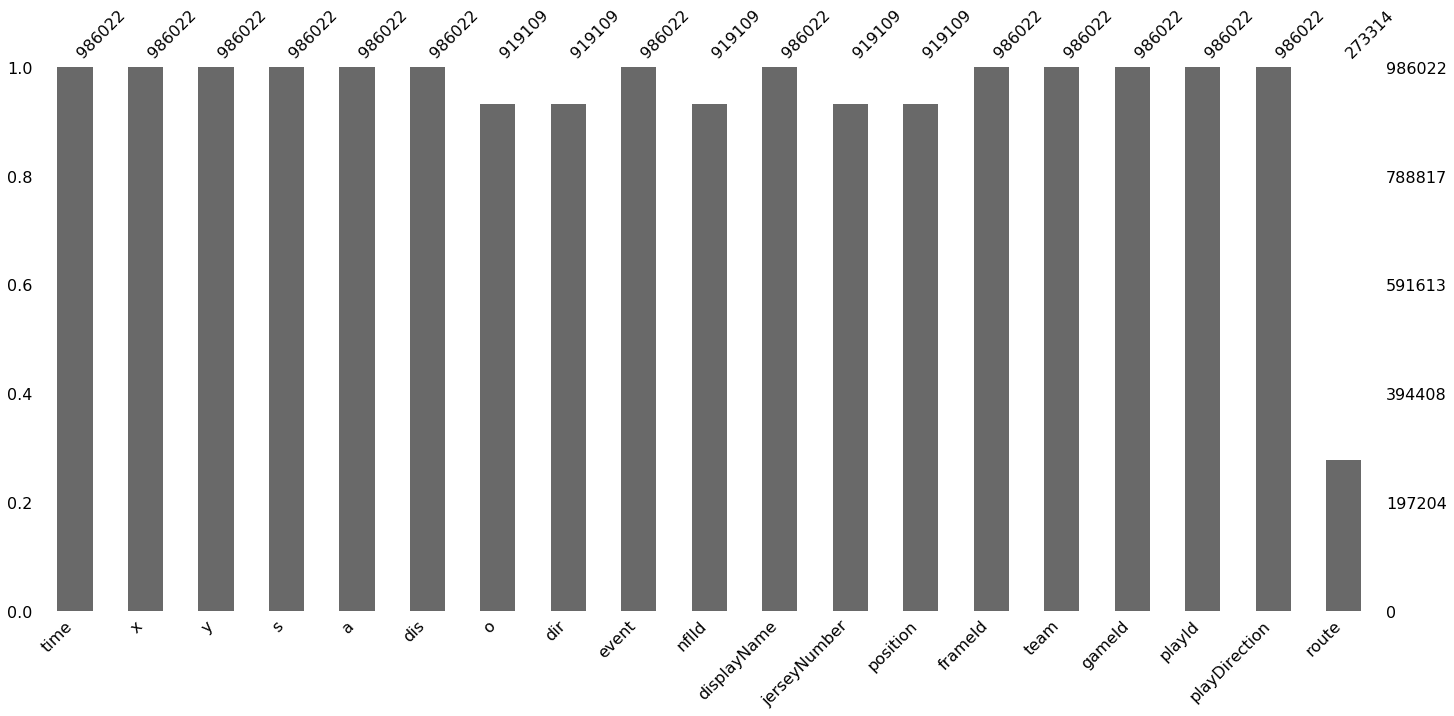

In [0]:
import missingno as msno
msno.bar(sp_week1.toPandas())
#This show the visualization about the missing number.

In [0]:
df_week1 = sp_week1.select('*').toPandas()

In the paper, the features are estimated at different point throughout the play that corresponds to on-field events. These times periods are:

(1) Before snap

(2)Between snap and ball thrown

(3) After ball thrown

In [0]:
import numpy as np
import pandas as pd

week1Array = np.array(df_week1)
previousEvent = 'ball_snap'
for i, instance in enumerate(week1Array):
    event = instance[8]
    frameId = instance[13]
    if (previousEvent == 'ball_snap' and event != 'ball_snap') or frameId == 1:
        week1Array[i][8] = 'ball_snap'
        previousEvent = 'ball_snap'
    elif (event == 'ball_snap'):
        previousEvent = 'between_snap'
    elif (previousEvent == 'between_snap' and event != 'pass_forward'):
        week1Array[i][8] = 'between_snap'
        previousEvent = 'between_snap'
    elif (event == 'pass_forward'):
        week1Array[i][8] = 'after_thrown'
        previousEvent = 'after_thrown'
    elif (previousEvent == 'after_thrown' and frameId != 1):
        week1Array[i][8] = 'after_thrown'
        previousEvent = 'after_thrown'
        
df_new_week1 = pd.DataFrame(week1Array, columns=df_week1.columns)
df_week1['event'] = df_new_week1['event']
df_new_week1 = df_week1


# 2. Feature Generation
We create 13 features for the unsupervised learning. In addition, the dataset of the previous paper is NFL Big Data Bowl 2019, which does not include player's orientation. However, the dataset of this year contains all player's orientation, which could be helpful in distinguishing man vs zone coverage scheme of cornerbacks. 

Therefore, in this paper, we generate two new features related player's orientation: 

(1) **opp_ori_var**- Variance in the orientation between player and the nearest opposing player

(2) **opp_ori_mean**- Mean difference in orientation between player and his nearest oppsing player. 


#### We generate 13 features for distingushing man vs zone coverage schema of cornerbacks
x_var: Variance in the x coordinate

y_var: Variance in the y coordinate

s_var: Variance in the speed

opp_var: Variance in the distance from the nearest opposing player in each frame

mate_var: Variance in the distance from the nearest teammate in each frame

opp_mean: Mean distance from the nearest opposing player in each frame

mate_mean: Mean distance from the nearest teammate in each frame

opp_dir_var: Variance in the difference in degrees of the direction of motion between the player and the nearest opposing player

opp_dir_mean: Mean difference in degrees of the direction of motion between the player and the nearest opposing player

rat_mean: Mean ratio of the distance to the nearest opposing player j and the distance from the nearest opposing player to the nearest teammate k

rat_var: Variance of the ratio of the distance to the nearest opposing player and the distance from the nearest opposing player to the nearest teammate k

**opp_ori_var- Variance in the orientation between player and the nearest opposing player**

**opp_ori_mean- Mean difference in orientation between player and his nearest oppsing player**

## 2.1 x_var, y_var, s_var
x_var: Variance in the x coordinate

y_var: Variance in the y coordinate

s_var: Variance in the speed

In [0]:
#x_var feature
x_var = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['x'].agg(['var']).reset_index().rename(columns={"var": "x_var"})
#y_var feature
y_var = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['y'].agg(['var']).reset_index().rename(columns={"var": "y_var"})
#s_var feature
s_var = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['s'].agg(['var']).reset_index().rename(columns={"var": "s_var"})

## 2.2 opp_var & opp_mean
opp_var: Variance in the distance from the nearest opposing player in each frame

opp_mean: Mean distance from the nearest opposing player in each frame

In [0]:
goup_new_week1 = df_new_week1.groupby(['gameId', 'playId', 'frameId'])
playerXY = {}
for name, group in goup_new_week1:
    playerXY[name] = []
    for row in group.iterrows():
        data = [row[1]['nflId'], row[1]['team'], row[1]['x'], row[1]['y'], row[1]['dir'], row[1]['o']]
        playerXY[name].append(data)

In [0]:
features = list(df_new_week1.columns)
week1Array = np.array(df_new_week1)
minOppDist = []
for player in week1Array:
    if player[features.index('team')] != 'football':
        opponentPositions = playerXY[(player[features.index('gameId')], player[features.index('playId')], player[features.index('frameId')])]
        distances = []
        directions = []
        orientations =[]
        opponents = []
        xs = []
        ys = []
        for oppPos in opponentPositions: 
            if player[features.index('team')] != oppPos[1] and player[features.index('team')] != 'football' and oppPos[1] != 'football':
                dx = (player[features.index('x')] - oppPos[2])**2
                dy = (player[features.index('y')] - oppPos[3])**2
                dist = np.sqrt(dx+dy)
                distances.append(dist)
                directions.append(oppPos[4])
                orientations.append(oppPos[5]) ##
                opponents.append(oppPos[0])
                xs.append(oppPos[2])
                ys.append(oppPos[3])
        minDist = min(distances)
        closestOpponent = opponents[np.argmin(distances)]
        opponentDir = directions[np.argmin(distances)]
        opponentOri = orientations[np.argmin(distances)]
        opponentX = xs[np.argmin(distances)]
        opponentY = ys[np.argmin(distances)]
        summary = [player[features.index('gameId')], player[features.index('playId')], player[features.index('frameId')], player[features.index('nflId')], minDist, closestOpponent, opponentDir, opponentOri, opponentX, opponentY]
        minOppDist.append(summary)
        
minOppDist = pd.DataFrame(minOppDist, columns=['gameId', 'playId', 'frameId', 'nflId', 'oppMinDist', 'closestOpp(nflId)', 'oppDir', 'oppOri', 'oppX', 'oppY'])
df_new_week1 = pd.merge(df_new_week1, minOppDist, how='left', on=['gameId', 'frameId', 'playId', 'nflId'])

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-1014153338168333> in <module> 
 22 xs . append ( oppPos [ 2 ] ) 
 23 ys . append ( oppPos [ 3 ] ) 
 ---> 24 minDist = min ( distances ) 
 25 closestOpponent = opponents [ np . argmin ( distances ) ] 
 26 opponentDir = directions [ np . argmin ( distances ) ] 

 /databricks/spark/python/pyspark/sql/functions.py in _ (col) 
 66 def _ ( col ) : 
 67 sc = SparkContext . _active_spark_context
 ---> 68 jc = getattr ( sc . _jvm . functions , name ) ( _to_java_column ( col ) ) 
 69 return Column ( jc ) 
 70 _ . __name__ = name

 /databricks/spark/python/pyspark/sql/column.py in _to_java_column (col) 
 54 "{0} of type {1}. " 
 55 "For column literals, use 'lit', 'array', 'struct' or 'create_map' " 
 ---> 56 "function.".format(col, type(col)))
 57 return jcol
 58 

 TypeError : Invalid argument, not a string or column: [10.20321517954022, 7.147866814651769, 18.203543611066504, 6.8822234779175835, 10.944551155712144, 18.51122092137631, 6.100524567608929] of type <class 'list'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

In [0]:
opp_var = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['oppMinDist'].agg(['var']).reset_index().rename(columns={"var": "opp_var"})
opp_mean = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['oppMinDist'].agg(['mean']).reset_index().rename(columns={"mean": "opp_mean"})

## 2.3 mate_var & mate_mean
mate_var: Variance in the distance from the nearest teammate in each frame

mate_mean: Mean distance from the nearest

In [0]:
features = list(df_new_week1.columns)
week1Array = np.array(df_new_week1)
minMateDist = []
for player in week1Array:
    if player[features.index('team')] != 'football':
        matePositions = playerXY[(player[features.index('gameId')], player[features.index('playId')], player[features.index('frameId')])]
        distances = []
        mates = []
        xs = []
        ys = []
        for matePos in matePositions: 
            if player[features.index('team')] == matePos[1] and player[features.index('nflId')] != matePos[0] and player[features.index('team')] != 'football' and matePos[1] != 'football':
                dx = (player[features.index('x')] - matePos[2])**2
                dy = (player[features.index('y')] - matePos[3])**2
                dist = np.sqrt(dx+dy)
                distances.append(dist)
                mates.append(matePos[0])
                xs.append(oppPos[2])
                ys.append(oppPos[3])
        minDist = min(distances)
        closestMate = mates[np.argmin(distances)]
        mateX = xs[np.argmin(distances)]
        mateY = ys[np.argmin(distances)]
        summary = [player[features.index('gameId')], player[features.index('playId')], player[features.index('frameId')], player[features.index('nflId')], minDist, closestMate, mateX, mateY]
        minMateDist.append(summary)

minMateDist = pd.DataFrame(minMateDist, columns=['gameId', 'playId', 'frameId', 'nflId', 'mateMinDist', 'closestMate(nflId)', 'mateX', 'mateY'])
df_new_week1 = pd.merge(df_new_week1, minMateDist, how='left', on=['gameId', 'frameId', 'playId', 'nflId'])


In [0]:
mate_var = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['mateMinDist'].agg(['var']).reset_index().rename(columns={"var": "mate_var"})
mate_mean = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['mateMinDist'].agg(['mean']).reset_index().rename(columns={"mean": "mate_mean"})

## 2.4 opp_dir_var & opp_dir_mean
opp_dir_var: Variance difference in degrees of the direction of motion between the player and the nearest opposing player

opp_dir_mean: Mean difference in degrees of the direction of motion between the player and the nearest opposing player

In [0]:
diff_dir = np.absolute(df_new_week1['dir'] - df_new_week1['oppDir'])
df_new_week1['diff_dir'] = diff_dir
opp_dir_var = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['diff_dir'].agg(['var']).reset_index().rename(columns={"var": "opp_dir_var"})
opp_dir_mean = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['diff_dir'].agg(['mean']).reset_index().rename(columns={"mean": "opp_dir_mean"})

## 2.5 rat_mean ＆ rat_var
rat_mean: Mean ratio of the distance to the nearest opposing player j and the distance from the nearest opposing player to the nearest teammate k

rat_var: Variance of the ratio of the distance to the nearest opposing player and the distance from the nearest opposing player to the nearest teammate k

In [0]:
ratio = df_new_week1['oppMinDist'] / np.sqrt((df_new_week1['oppX'] - df_new_week1['mateX'])**2 + (df_new_week1['oppY'] - df_new_week1['mateY'])**2)
df_new_week1['oppMateDistRatio'] = ratio
rat_mean = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['oppMateDistRatio'].agg(['mean']).reset_index().rename(columns={"mean": "rat_mean"})
rat_var = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['oppMateDistRatio'].agg(['var']).reset_index().rename(columns={"var": "rat_mean"})

## 2.6 opp_ori_var & opp_ori_mean
opp_ori_var: Variance difference in the orientation of motion between the player and the nearest opposing player

opp_ori_mean: Mean difference in the orientation of motion between the player and the nearest opposing player

In [0]:
diff_oir = np.absolute(df_new_week1['o'] - df_new_week1['oppOri'])
df_new_week1['diff_oir'] = diff_oir
opp_ori_var = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['diff_oir'].agg(['var']).reset_index().rename(columns={"var": "opp_ori_var"})
opp_ori_mean = df_new_week1.groupby(['gameId', 'playId', 'event', 'nflId'])['diff_oir'].agg(['mean']).reset_index().rename(columns={"mean": "opp_ori_mean"})

## 2.7 Combine all new feature into the original data

In [0]:
features = [x_var, y_var, s_var, opp_var, opp_mean, mate_var, mate_mean, opp_dir_var, opp_dir_mean, rat_mean, rat_var, opp_ori_var, opp_ori_mean]
for feature in features:
    df_new_week1 = pd.merge(df_new_week1, feature, how='left', on=['gameId', 'event', 'playId', 'nflId'])

In [0]:
df_new_week1.head()

# 3. Gaussian mixture model in Python

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
# Set the train dataset
X = df_new_week1.loc[df_new_week1['position'] == 'CB'][df_new_week1.columns[32:]].dropna()
xTrain = X.drop_duplicates()

# Scale the data
scaler = MinMaxScaler()
scaler.fit(xTrain)
xTrainScaled = scaler.transform(xTrain)

# Set and train the Gaussian mixture model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(xTrainScaled)

# Make class prediction and probability estimation
pred = gmm.predict(X)
prob = gmm.predict_proba(X)

# Join the class prediction and probability estimation into our main dataframe
X['cluster'] = pred
X['cluster_prob'] = prob[:,0]
weekFin = df_new_week1.join(X[['cluster', 'cluster_prob']])


# 4. Gaussian mixture model in Pyspark

In [0]:
sp_X = spark.createDataFrame(X)
sp_xTrain = spark.createDataFrame(xTrain)
sp_xTrain.columns

In [0]:
#Prepare for machine learning
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)
seed_data = VectorAssembler(inputCols = sp_xTrain.columns, outputCol='features').transform(sp_xTrain)

In [0]:
#Scale the data
from pyspark.ml.feature import StandardScaler
# withMean Returns if the model centers the data before scaling.
# withStd Returns if the model scales the data to unit standard deviation.
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [0]:
seed_data_scaled = scaler.fit(seed_data).transform(seed_data) #New dataset

## 4.1 Cluster Evaluation

We use **Silhouette Coefficient Method:**

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

·The mean distance between a sample and all other points in the same class.

·The mean distance between a sample and all other points in the next nearest cluster.

To find the optimal value of k for GaussianMixture, loop through 1..n for n_clusters in GaussianMixture and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Reference:https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation

In [0]:
#Use GaussianMixture model
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture(featuresCol='scaledFeatures').setK(2).setSeed(101)
model = gmm.fit(seed_data_scaled)

#The result
prediction = model.transform(seed_data_scaled)
#prediction.show()

#Cluster evaluation
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette = ClusteringEvaluator().evaluate(prediction)
print("Silhouette value is = " + str(silhouette))


In [0]:
silhouette_scores = [] 

for k in range(2, 8):
  gmm2 = GaussianMixture(featuresCol='scaledFeatures').setK(k).setSeed(101)
  models = gmm2.fit(seed_data_scaled)
  predictions = models.transform(seed_data_scaled)
  silhouettes = ClusteringEvaluator().evaluate(predictions)
  print("Silhouette value is = " + str(silhouettes))
# Divide data into 2 cluster is the best choice

## 4.2 Merge the result into original data

In [0]:
#Merge the reasult data into the original data
sp_new_week1 = spark.createDataFrame(df_new_week1)
new_df = sp_new_week1.join(prediction, on=['x_var','y_var','s_var','opp_var','opp_mean','mate_var','mate_mean','opp_dir_var','opp_dir_mean','rat_mean_x','rat_mean_y','opp_ori_var','opp_ori_mean'], how='left_outer')
new_df.show()

In [0]:
#Using SQL
new_df.createOrReplaceTempView('new_df')

In [0]:
results = spark.sql("SELECT gameId, playId, position, jerseyNumber, frameId, probability, prediction FROM new_df WHERE position=='CB' ORDER BY gameId, playId, frameId" )
results.show(1000)

# 5. Try Other Clustering Models

## 5.1 K-Means Cluster

In [0]:
from pyspark.ml.clustering import KMeans
for k in range(2, 8):
  kmeans = KMeans(featuresCol='scaledFeatures',k=k).setSeed(101)
  k_model = kmeans.fit(seed_data_scaled)
  k_predictions = k_model.transform(seed_data_scaled)
  k_silhouette = ClusteringEvaluator().evaluate(k_predictions)
  print("Silhouette value is = " + str(k_silhouette))

## 5.2 BisectingKMeans

In [0]:
from pyspark.ml.clustering import BisectingKMeans
for k in range(2, 8):
  bkm = BisectingKMeans(featuresCol='scaledFeatures').setK(k).setSeed(101)
  bkm_model = bkm.fit(seed_data_scaled)
  bkm_predictions = bkm_model.transform(seed_data_scaled)
  bkm_silhouette = ClusteringEvaluator().evaluate(bkm_predictions)
  print("Silhouette with squared euclidean distance = " + str(bkm_silhouette))

## Conclusion: Gaussian mixture model with k=2 has the best performance